In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/adult (1).csv")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
column_names = ["Age", "workclass", "fnlwgt", "Education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]

In [ ]:
df.columns = column_names

In [ ]:
df

,Age,workclass,fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.isnull().sum()

Age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
df.shape

(32560, 15)

In [ ]:
df.describe()

,Age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df['income'].value_counts()

 <=50K    24719
 >50K      7841
Name: income, dtype: int64

In [ ]:
df['sex'].value_counts()

 Male      21789
 Female    10771
Name: sex, dtype: int64

In [ ]:
df['native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
df = df.drop(['Education', 'fnlwgt'], axis = 1)
df.head(1)

,Age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['marital_status'] = le.fit_transform(df['marital_status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['native_country'] = le.fit_transform(df['native_country'])
df['income'] = le.fit_transform(df['income'])

df.head()

,Age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,6,13,2,4,0,4,1,0,0,13,39,0
1,38,4,9,0,6,1,4,1,0,0,40,39,0
2,53,4,7,2,6,0,2,1,0,0,40,39,0
3,28,4,13,2,10,5,2,0,0,0,40,5,0
4,37,4,14,2,4,5,4,0,0,0,40,39,0


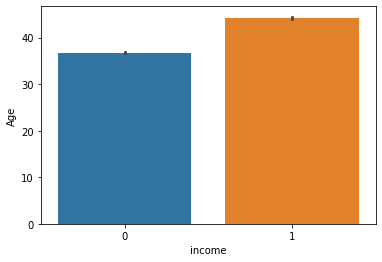

In [ ]:
sns.barplot(x = 'income', y = 'Age', data = df)

In [ ]:
x = df.drop(['income'], axis = 1)
y = df['income']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

1. Gaussian Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_predgnb = gnb.predict(x_test)
print(y_predgnb)

[0 0 0 ... 0 0 0]


In [ ]:
print(accuracy_score(y_test, y_predgnb)*100)

80.1443488943489


In [ ]:
cmgnb = np.array(confusion_matrix(y_test, y_predgnb))
cmgnb

array([[4729,  232],
       [1061,  490]])

In [ ]:
print(classification_report(y_test,y_predgnb))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4961
           1       0.68      0.32      0.43      1551

    accuracy                           0.80      6512
   macro avg       0.75      0.63      0.66      6512
weighted avg       0.78      0.80      0.77      6512



2. Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state = 10)

In [ ]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
y_preddt = dt_model.predict(x_test)
print(y_preddt)

[1 1 0 ... 0 0 0]


In [ ]:
print(accuracy_score(y_test, y_preddt)*100)

82.23280098280098


In [ ]:
cmdt = np.array(confusion_matrix(y_test, y_preddt))
cmdt

array([[4403,  558],
       [ 599,  952]])

In [ ]:
print(classification_report(y_test,y_preddt))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      4961
           1       0.63      0.61      0.62      1551

    accuracy                           0.82      6512
   macro avg       0.76      0.75      0.75      6512
weighted avg       0.82      0.82      0.82      6512



3.Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_predrf = rf.predict(x_test)
print(y_predrf)

[1 0 0 ... 0 0 0]


In [ ]:
print(accuracy_score(y_test, y_predrf)*100)

84.99692874692875


In [ ]:
cmrf = np.array(confusion_matrix(y_test, y_predrf))
cmrf

array([[4583,  378],
       [ 599,  952]])

In [ ]:
print(classification_report(y_test,y_predrf))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4961
           1       0.72      0.61      0.66      1551

    accuracy                           0.85      6512
   macro avg       0.80      0.77      0.78      6512
weighted avg       0.84      0.85      0.85      6512



4. logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_predlr = log_reg.predict(x_test)
print(y_predlr)

[0 0 0 ... 0 0 0]


In [ ]:
print(accuracy_score(y_test, y_predlr)*100)

80.46683046683046


In [ ]:
cmlr = np.array(confusion_matrix(y_test, y_predlr))
cmlr

array([[4698,  263],
       [1009,  542]])

In [ ]:
print(classification_report(y_test,y_predlr))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4961
           1       0.67      0.35      0.46      1551

    accuracy                           0.80      6512
   macro avg       0.75      0.65      0.67      6512
weighted avg       0.79      0.80      0.78      6512



5. KNN Classifier

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train,y_train)


KNeighborsClassifier()

In [ ]:
y_predknn = classifier.predict(x_test)
print(y_predknn)

[1 1 0 ... 0 0 0]


In [ ]:
print(accuracy_score(y_test, y_predknn)*100)

83.15417690417691


In [ ]:
cmknn = np.array(confusion_matrix(y_test, y_predknn))
cmknn

array([[4522,  439],
       [ 658,  893]])

In [ ]:
print(classification_report(y_test,y_predknn))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4961
           1       0.67      0.58      0.62      1551

    accuracy                           0.83      6512
   macro avg       0.77      0.74      0.76      6512
weighted avg       0.82      0.83      0.83      6512

